In [1]:
from __future__ import annotations
import matplotlib.pyplot as plt
import warnings
import pickle
import numpy as np
import seaborn as sns
import scipy.stats as stats
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 5)

## Loading The Data

In [2]:
reward_changed = pickle.load(open("rewards/rewards_changed",'rb'))
reward_default = pickle.load(open("rewards/rewards_default",'rb'))
seeds = ['seed 1', 'seed 2', 'seed 3']

## Result Comparison

Checking the distribution of rewards obtained by our agent during testing and compare their means

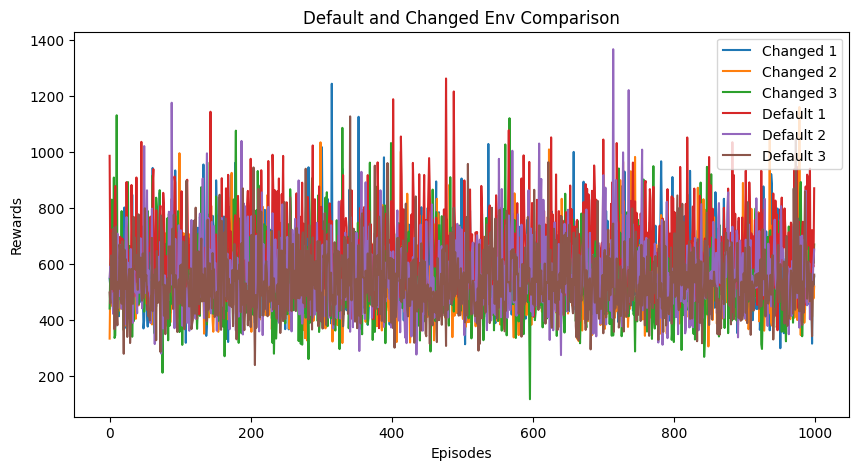

In [3]:
plt.plot(reward_changed[0], label="Changed 1")
plt.plot(reward_changed[1], label="Changed 2")
plt.plot(reward_changed[2], label="Changed 3")
plt.plot(reward_default[0], label="Default 1")
plt.plot(reward_default[1], label="Default 2")
plt.plot(reward_default[2], label="Default 3")
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Default and Changed Env Comparison')
plt.legend()
plt.show()

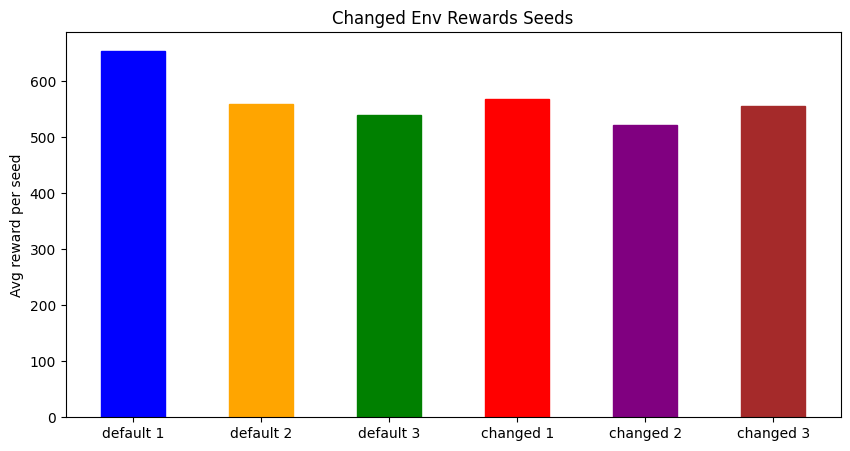

In [4]:
all_means = []
seeds = ['default 1', 'default 2', 'default 3', 'changed 1', 'changed 2', 'changed 3']
for i in range(6):
    if i<=2:
        all_means.append(np.mean(reward_default[i]))
    else:
        all_means.append(np.mean(reward_changed[i-3]))

bars = plt.bar(x = seeds, height=all_means, align='center', width= 0.5)
plt.ylabel('Avg reward per seed')
plt.title('Changed Env Rewards Seeds')
bars[0].set_color('blue')
bars[1].set_color('orange')
bars[2].set_color('green')
bars[3].set_color('red')
bars[4].set_color('purple')
bars[5].set_color('brown')

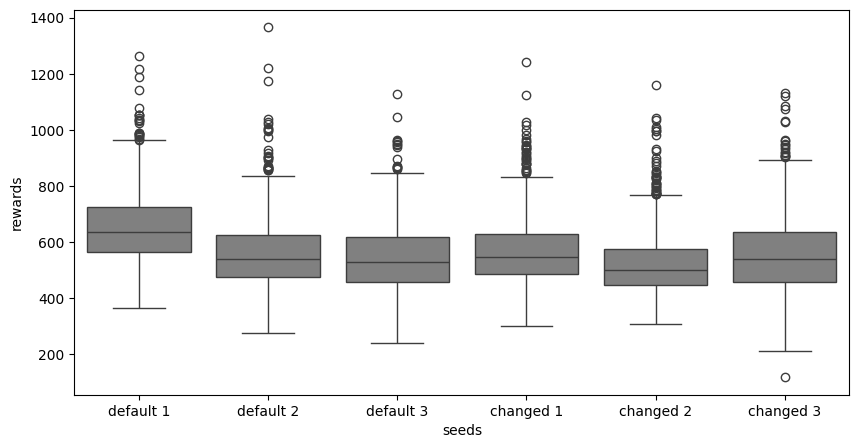

In [5]:
rewards_dict = {}
for i in range(6):
    if i <=2:
        rewards_dict['default '+str(i+1)] = reward_default[i]
    else:
        rewards_dict['changed '+str(i-2)] = reward_changed[i-3]
    
ax = sns.boxplot(data= rewards_dict, color='grey')
plt.xlabel('seeds')
plt.ylabel('rewards')
plt.show()

In [6]:
flattened_default_rewards = np.array(reward_default).flatten('F')
flattened_changed_rewards = np.array(reward_changed).flatten('F')

Text(0.5, 1.0, 'Distribution of rewards of changed model')

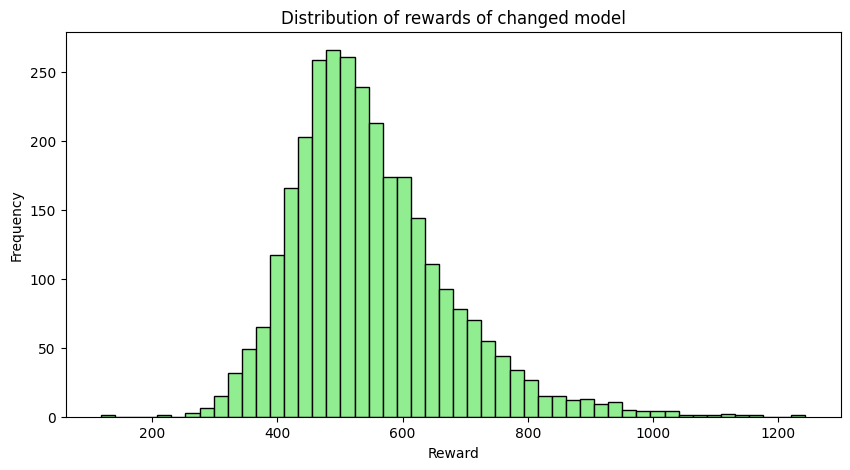

In [7]:
flattened_changed_rewards.sort()
plt.hist(flattened_changed_rewards, color='lightgreen', ec='black', bins=50)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Distribution of rewards of changed model')

Text(0.5, 1.0, 'Distribution of rewards of default model')

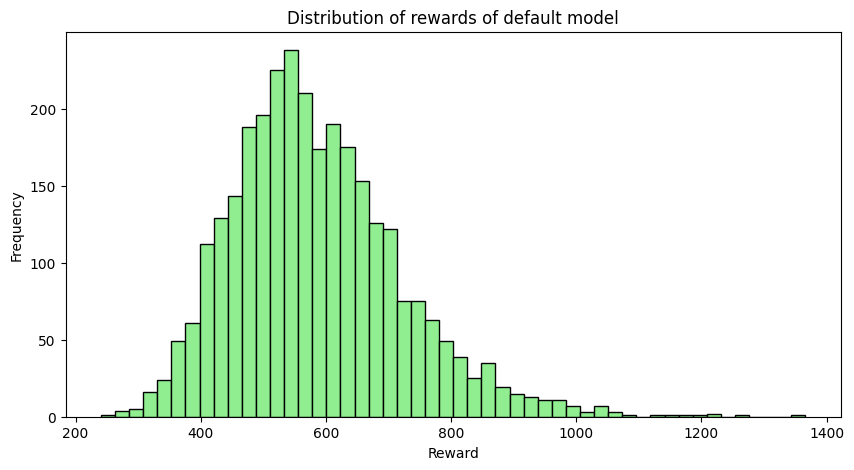

In [8]:
flattened_default_rewards.sort()
plt.hist(flattened_default_rewards, color='lightgreen', ec='black', bins=50)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Distribution of rewards of default model')

### T-Test

We perform a T-Test to verify if the difference in our sets of rewards is statiscally significant

In [9]:
ttest_result = stats.ttest_ind(flattened_default_rewards, flattened_changed_rewards, equal_var=False)
print(f"Test Results\nstatistic: {ttest_result.statistic}\ndegrees of freedom: {ttest_result.df}\npvalue: {ttest_result.pvalue}")

Test Results
statistic: 10.696914047665128
degrees of freedom: 5955.495487925635
pvalue: 1.82772614587155e-26


The results return a very low p-value, indicating that there is indeed a significant difference in the means of the two sets of rewards. 

Therefore, we can state that there is a difference in the agent trained with or without the custom changes to the environment.

We verify that the agent trained with the default reward settings achieved a better performance for this number of timesteps in training.